___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

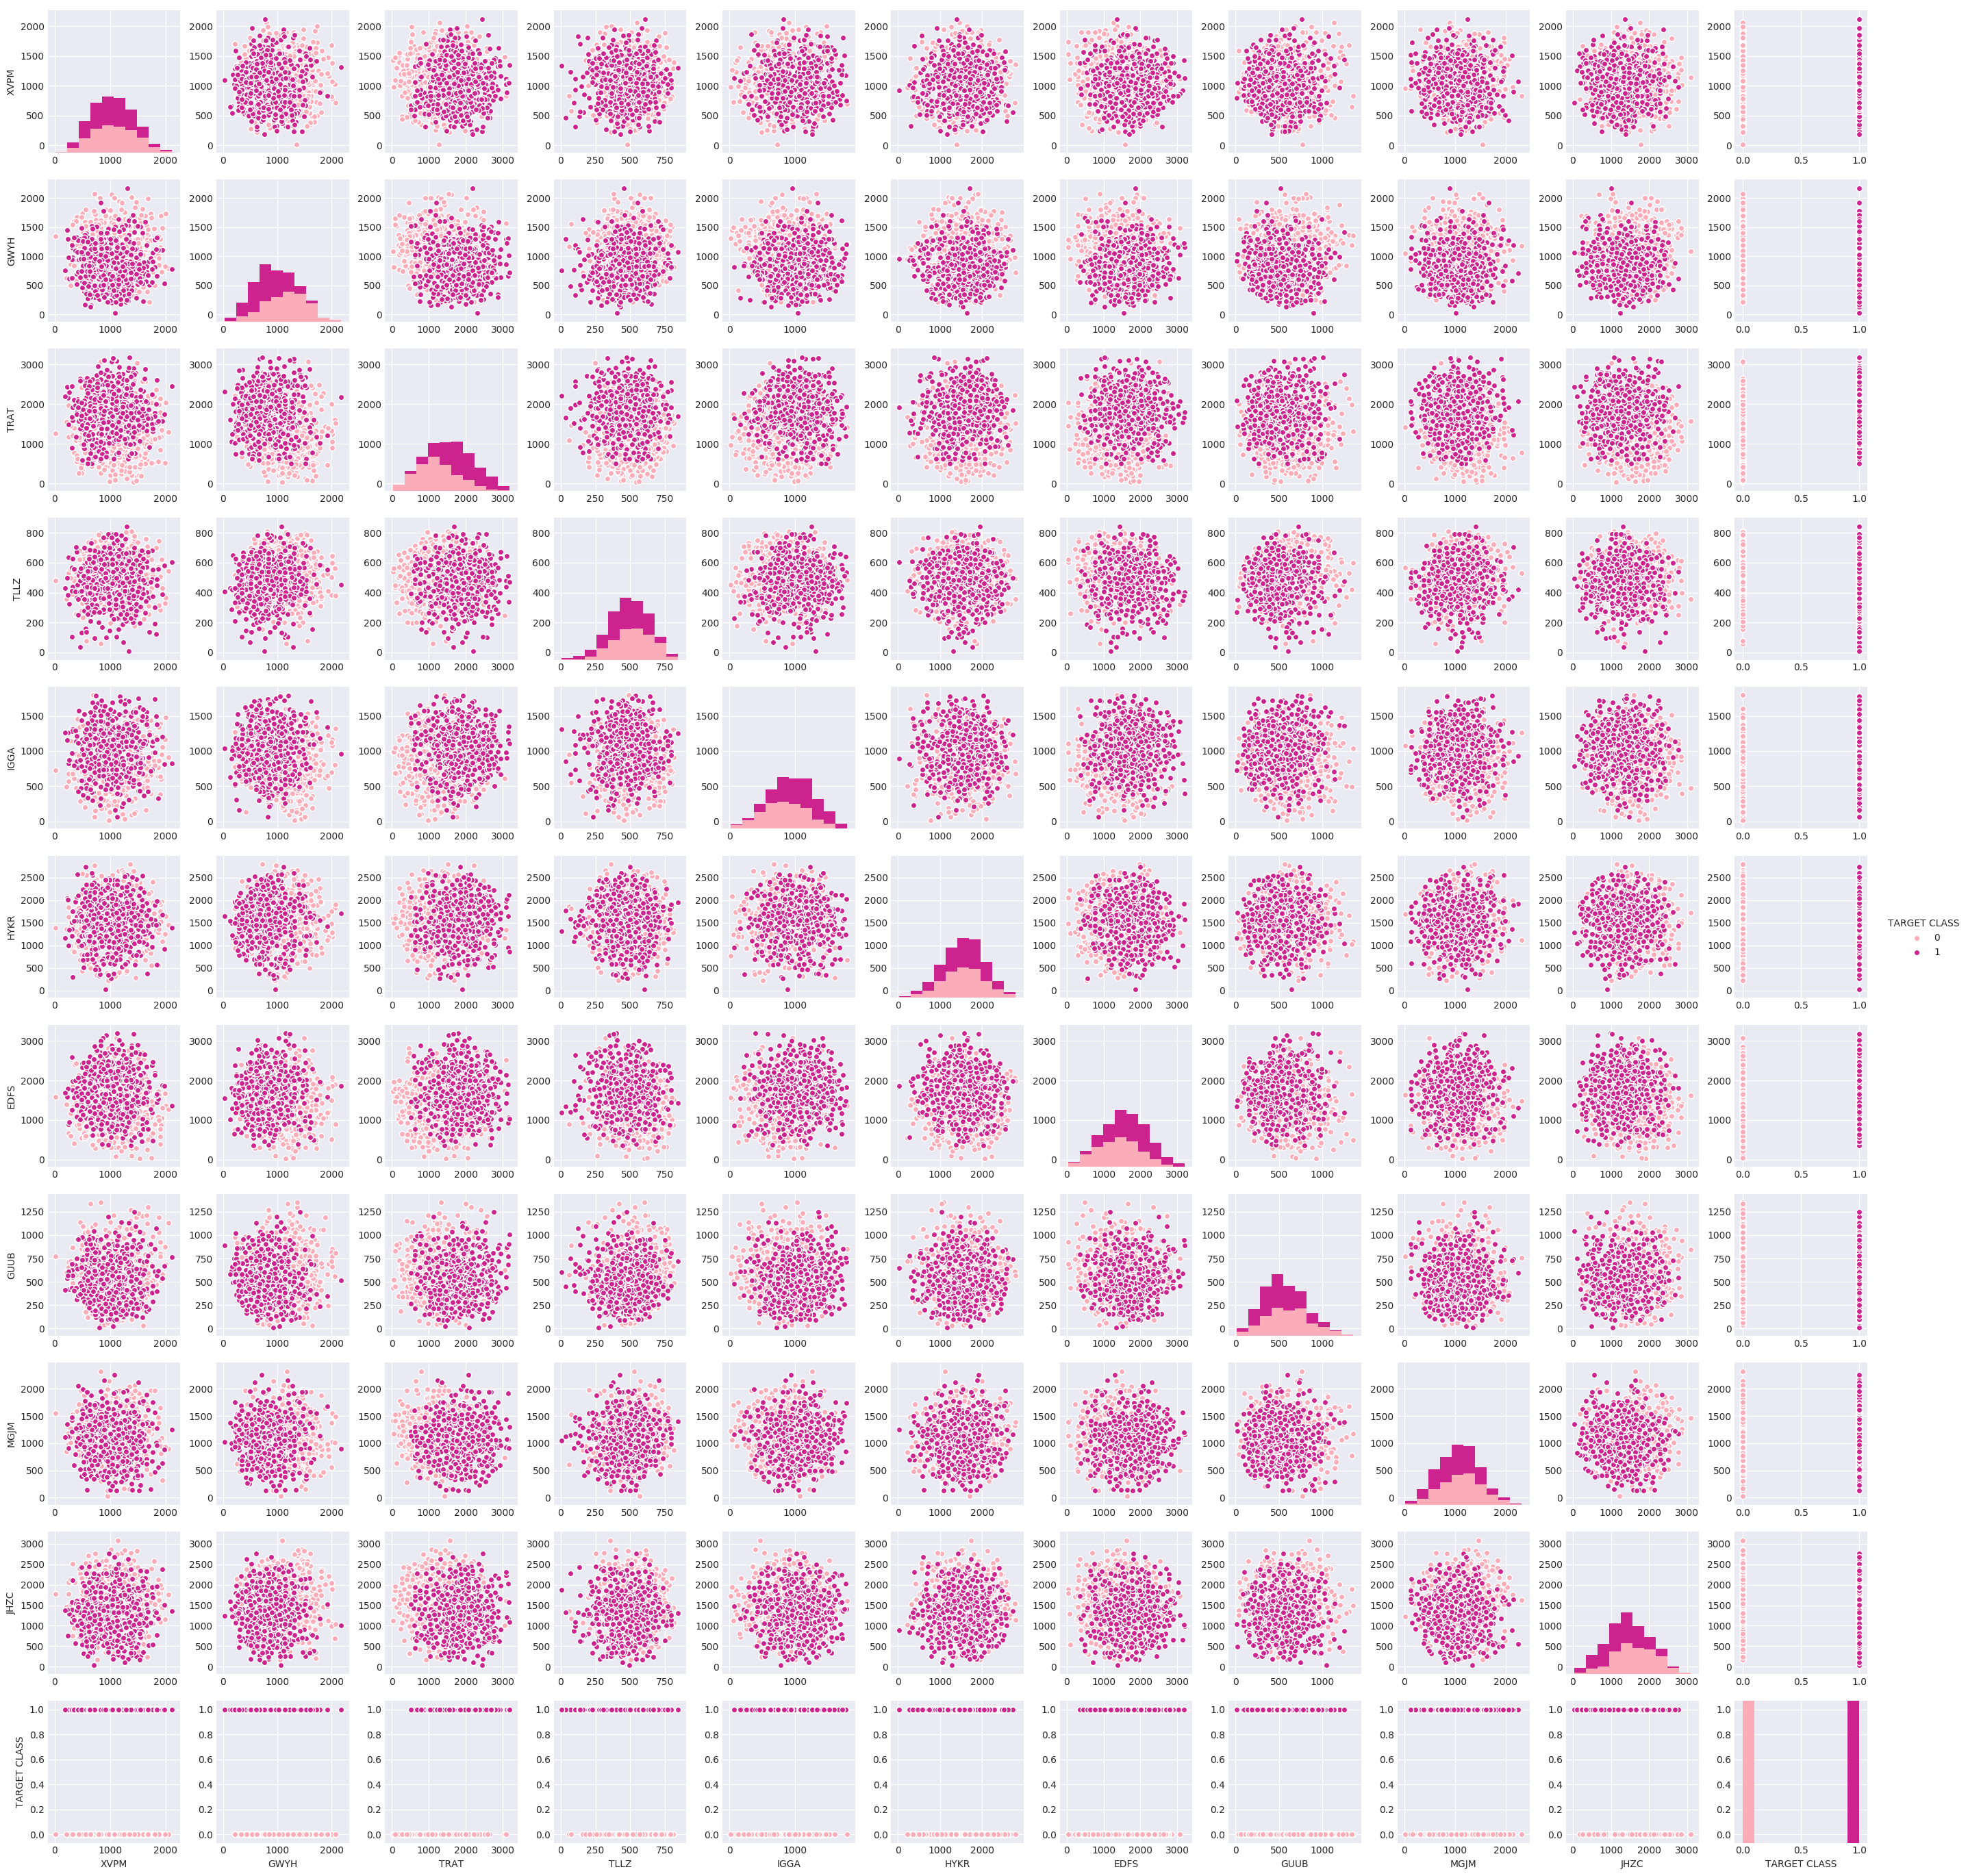

In [10]:
sns.pairplot(df, hue='TARGET CLASS', palette='RdPu')

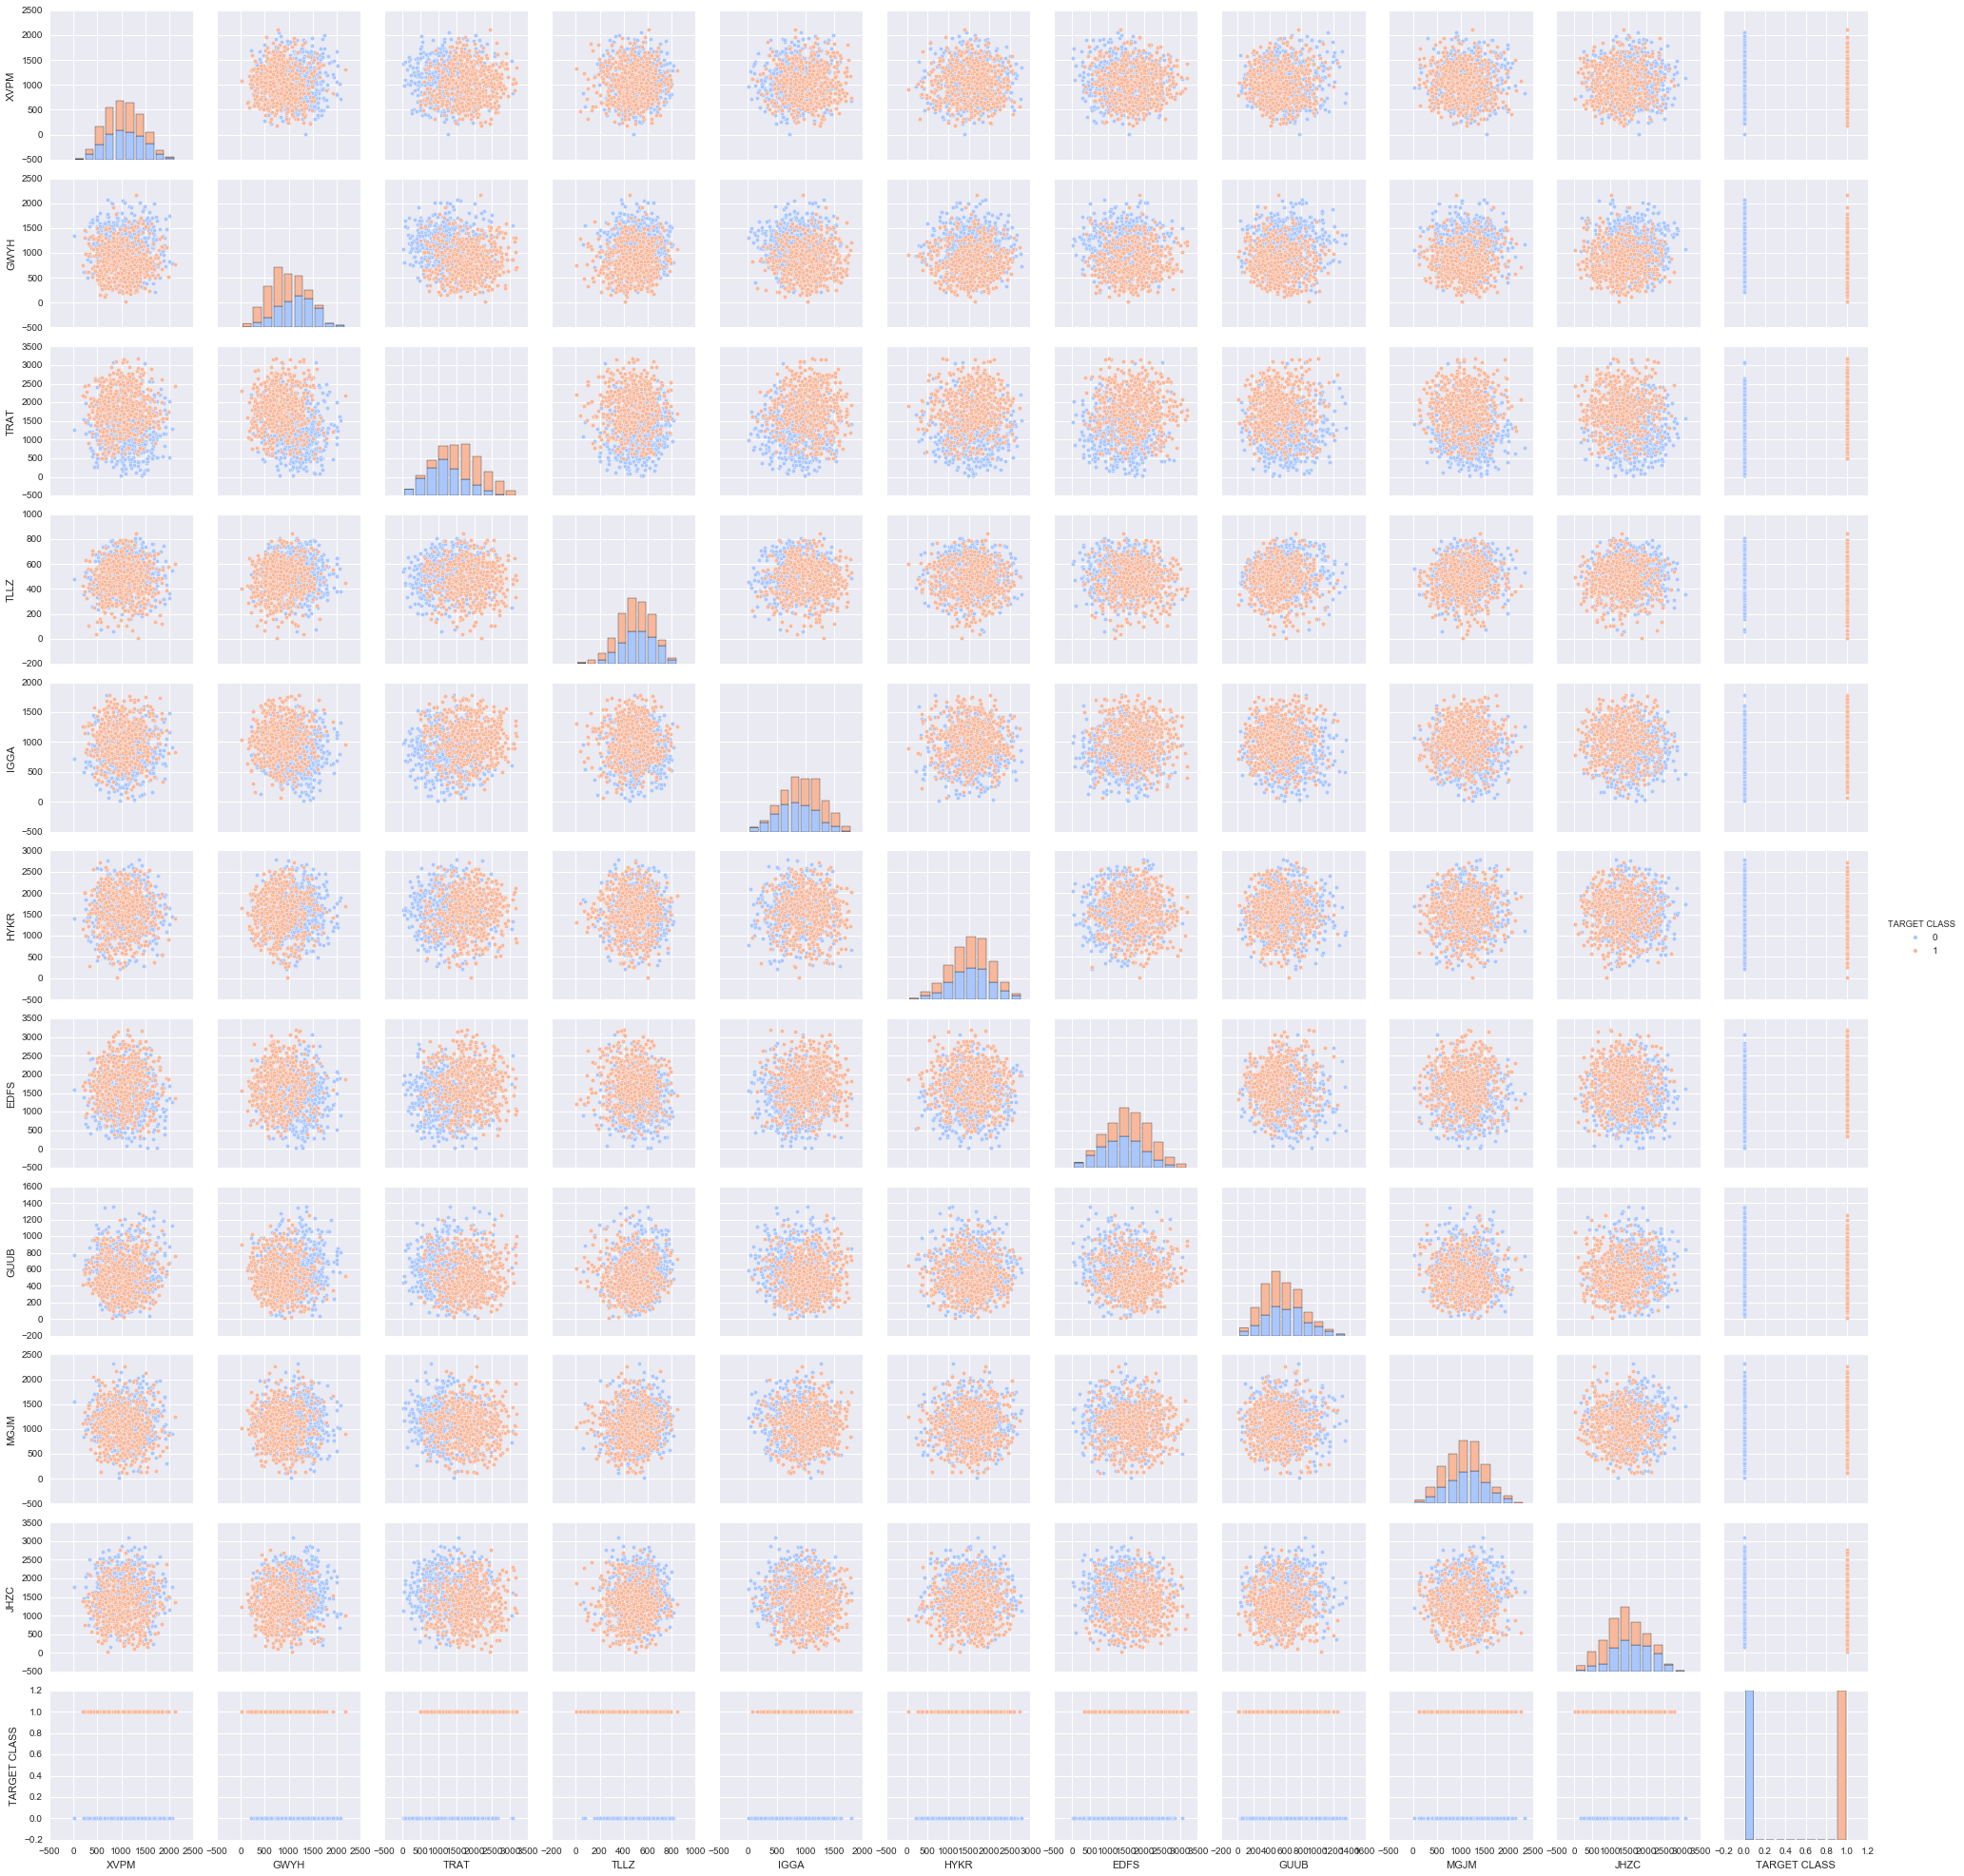

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [11]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [12]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [16]:
df.columns

Index([u'XVPM', u'GWYH', u'TRAT', u'TLLZ', u'IGGA', u'HYKR', u'EDFS', u'GUUB',
       u'MGJM', u'JHZC', u'TARGET'],
      dtype='object')

In [22]:
feats = df.loc[:, 'XVPM':'JHZC']

In [24]:
print feats.shape
feats.sample(5)

(1000, 10)


XVPM         GWYH         TRAT        TLLZ         IGGA  \
461   431.663979   603.116306  1112.873989  412.928287   584.093332   
115  1142.863320  1082.725153  1568.487299  355.906626   472.734362   
496   847.851026   887.445717  1681.299947  655.015160  1027.416561   
875   693.852436   645.463612  1450.619997  604.068836  1092.023319   
296   714.911229  1546.169672  1077.510646  612.184733   846.149117   

            HYKR         EDFS        GUUB         MGJM         JHZC  
461   975.655325  2141.651133  962.373790   851.662611  1632.249530  
115  1726.300074  1628.014891  844.767316  1462.726087  3089.000000  
496  2535.076786  1059.330030  693.892265   758.713824  1215.240006  
875  1587.223379   767.985553  397.997637   861.112033   729.800576  
296  1576.543038  1594.592231  131.458056  1371.181629  1531.002291

In [25]:
scaler.fit(feats)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [26]:
feats_scaled = scaler.transform(feats)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [31]:
fscaled_df = pd.DataFrame(feats_scaled, columns=feats.columns)
fscaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = fscaled_df
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [37]:
y_pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
confusion_matrix(y_test, y_pred)

array([[119,  44],
       [ 50, 117]])

[[112  40]
 [ 34 114]]


In [41]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.70      0.73      0.72       163
          1       0.73      0.70      0.71       167

avg / total       0.72      0.72      0.72       330



             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



In [42]:
knn.score(X_test, y_test)

0.7151515151515152

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [43]:
error_rate = []

# Will take some time
for i in xrange(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0.5,1,u'K v Error Rate')

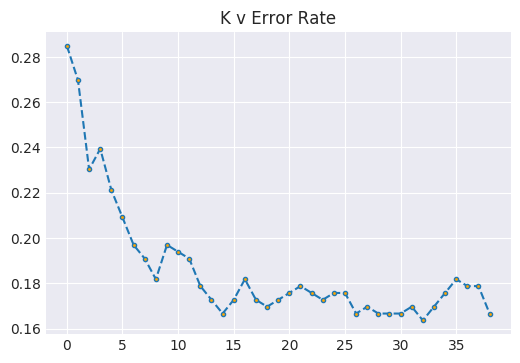

In [62]:
plt.plot(error_rate, linestyle='dashed', marker='o', markerfacecolor='orange', markersize=3)
plt.title('K v Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [63]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train, y_train)
pred_33 = knn.predict(X_test)

In [64]:
confusion_matrix(y_test, pred_33)

array([[140,  23],
       [ 31, 136]])

In [65]:
print classification_report(y_test, pred_33)

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       163
          1       0.86      0.81      0.83       167

avg / total       0.84      0.84      0.84       330



# Great Job!